In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
pd.set_option('display.max_columns', None)
%config IPCompleter.greedy=True


In [2]:
raw_veh_stop_sept = pd.read_csv('trimet_congestion/init_veh_stoph 1-30SEP2017.csv')

In [3]:
tripsh_sept = pd.read_csv('trimet_congestion/init_tripsh 1-30SEP2017.csv')

In [4]:
tripsh_sept.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179522 entries, 0 to 179521
Data columns (total 28 columns):
OPD_DATE              179522 non-null object
VEHICLE_ID            179522 non-null int64
MASTER_ID             0 non-null float64
EVENT_NO              179522 non-null int64
EVENT_NO_COURSE       179522 non-null int64
METERS                179522 non-null int64
ACT_DEP_TIME          179522 non-null int64
NOM_DEP_TIME          179522 non-null int64
NOM_END_TIME          179522 non-null int64
ACT_END_TIME          179399 non-null float64
LINE_ID               179522 non-null int64
COURSE_ID             179522 non-null int64
TRIP_ID               179207 non-null float64
PATTERN_ID            179522 non-null int64
PATTERN_DIRECTION     132349 non-null object
TRIP_TYPE             179522 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       179522 non-null int64
BLOCK_ID              179522 non-null int64
PASSENGER_DATA        178308 non-null float64
TIME_GR

In [5]:
raw_veh_stop_sept.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11031281 entries, 0 to 11031280
Data columns (total 26 columns):
EVENT_NO              11031281 non-null int64
EVENT_NO_TRIP         11031281 non-null int64
EVENT_NO_PREV         11031281 non-null int64
OPD_DATE              11031281 non-null object
VEHICLE_ID            11031281 non-null int64
MASTER_ID             0 non-null float64
METERS                11031281 non-null int64
ACT_ARR_TIME          11031281 non-null int64
ACT_DEP_TIME          11031281 non-null int64
NOM_ARR_TIME          9108913 non-null float64
NOM_DEP_TIME          9108913 non-null float64
POINT_ID              11031281 non-null int64
STOP_ID               9136454 non-null float64
STOP_POS              11031281 non-null int64
DISTANCE_TO_NEXT      10849661 non-null float64
DISTANCE_TO_TRIP      9136454 non-null float64
DOORS_OPENING         10849661 non-null float64
POSITIONING_METHOD    11031281 non-null int64
STOP_TYPE             10849661 non-null float64
GPS_L

In [6]:
stop_type = tripsh_sept.merge(raw_veh_stop_sept, left_on='EVENT_NO', right_on='EVENT_NO_TRIP', how='inner')


In [7]:
stop_type.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10995083 entries, 0 to 10995082
Data columns (total 54 columns):
OPD_DATE_x            10995083 non-null object
VEHICLE_ID_x          10995083 non-null int64
MASTER_ID_x           0 non-null float64
EVENT_NO_x            10995083 non-null int64
EVENT_NO_COURSE       10995083 non-null int64
METERS_x              10995083 non-null int64
ACT_DEP_TIME_x        10995083 non-null int64
NOM_DEP_TIME_x        10995083 non-null int64
NOM_END_TIME          10995083 non-null int64
ACT_END_TIME          10993570 non-null float64
LINE_ID               10995083 non-null int64
COURSE_ID             10995083 non-null int64
TRIP_ID               10977852 non-null float64
PATTERN_ID            10995083 non-null int64
PATTERN_DIRECTION     10339616 non-null object
TRIP_TYPE             10995083 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       10995083 non-null int64
BLOCK_ID              10995083 non-null int64
PASSENGER_DATA 

In [9]:
stop_type['TIME_DIFF'] = stop_type['ACT_DEP_TIME_y'] - stop_type['ACT_ARR_TIME']
stop_type.head()

,OPD_DATE_x,VEHICLE_ID_x,MASTER_ID_x,EVENT_NO_x,EVENT_NO_COURSE,METERS_x,ACT_DEP_TIME_x,NOM_DEP_TIME_x,NOM_END_TIME,ACT_END_TIME,LINE_ID,COURSE_ID,TRIP_ID,PATTERN_ID,PATTERN_DIRECTION,TRIP_TYPE,HIGHWAY_TYPE,PATTERN_QUALITY,BLOCK_ID,PASSENGER_DATA,TIME_GRP_ID,TRIP_CODE,DRIVER_ID,DATA_SOURCE,IS_ADDITIONAL_TRIP,TRIP_ROLE,TRIP_SUBROLE,TRIP_PURPOSE,EVENT_NO_y,EVENT_NO_TRIP,EVENT_NO_PREV,OPD_DATE_y,VEHICLE_ID_y,MASTER_ID_y,METERS_y,ACT_ARR_TIME,ACT_DEP_TIME_y,NOM_ARR_TIME,NOM_DEP_TIME_y,POINT_ID,STOP_ID,STOP_POS,DISTANCE_TO_NEXT,DISTANCE_TO_TRIP,DOORS_OPENING,POSITIONING_METHOD,STOP_TYPE,GPS_LONGITUDE,GPS_LATITUDE,PATTERN_IDX,DOOR_OPEN_TIME,POINT_ROLE,POINT_ACTION,PLAN_STATUS,TIME_DIFF
0,01SEP2017:00:00:00,2226,NaN,868641436,868641435,434,22070,22080,22920,22890.0,72,1032235,11698634.0,347437,NaN,3,NaN,85,1019372,1.0,11698633.0,7609730,1919.0,4,0,D,N,NaN,868641438,868641436,868641437,01SEP2017:00:00:00,2226,NaN,223,22001,22001,NaN,NaN,9493,NaN,0,NaN,NaN,NaN,0,NaN,-122.563187,45.495873,NaN,NaN,DO,L,P,0
1,01SEP2017:00:00:00,2226,NaN,868641436,868641435,434,22070,22080,22920,22890.0,72,1032235,11698634.0,347437,NaN,3,NaN,85,1019372,1.0,11698633.0,7609730,1919.0,4,0,D,N,NaN,868641443,868641436,868641442,01SEP2017:00:00:00,2226,NaN,2938,22282,22282,NaN,NaN,9493,NaN,0,NaN,NaN,NaN,0,NaN,-122.565718,45.493607,NaN,NaN,D,L,P,0
2,01SEP2017:00:00:00,2226,NaN,868641436,868641435,434,22070,22080,22920,22890.0,72,1032235,11698634.0,347437,NaN,3,NaN,85,1019372,1.0,11698633.0,7609730,1919.0,4,0,D,N,NaN,868641445,868641436,868641444,01SEP2017:00:00:00,2226,NaN,9257,22551,22551,22832.0,22832.0,12972,12972.0,0,729.0,5925.0,1.0,0,7.0,-122.568490,45.438747,3.0,0.0,T,D,P,0
3,01SEP2017:00:00:00,2226,NaN,868641436,868641435,434,22070,22080,22920,22890.0,72,1032235,11698634.0,347437,NaN,3,NaN,85,1019372,1.0,11698633.0,7609730,1919.0,4,0,D,N,NaN,868641446,868641436,868641445,01SEP2017:00:00:00,2226,NaN,9980,22625,22625,22893.0,22893.0,13326,13326.0,0,165.0,6654.0,1.0,0,7.0,-122.568798,45.434830,4.0,0.0,T,D,P,0
4,01SEP2017:00:00:00,2226,NaN,868641436,868641435,434,22070,22080,22920,22890.0,72,1032235,11698634.0,347437,NaN,3,NaN,85,1019372,1.0,11698633.0,7609730,1919.0,4,0,D,N,NaN,868641448,868641436,868641447,01SEP2017:00:00:00,2226,NaN,10151,22766,22836,NaN,NaN,13247,13247.0,1,150.0,6819.0,0.0,0,5.0,-122.568280,45.435995,5.0,61.0,S,HO,P,70


In [10]:
stop_type = stop_type[stop_type.TIME_DIFF != 0]
stop_type.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160823 entries, 4 to 10995080
Data columns (total 55 columns):
OPD_DATE_x            5160823 non-null object
VEHICLE_ID_x          5160823 non-null int64
MASTER_ID_x           0 non-null float64
EVENT_NO_x            5160823 non-null int64
EVENT_NO_COURSE       5160823 non-null int64
METERS_x              5160823 non-null int64
ACT_DEP_TIME_x        5160823 non-null int64
NOM_DEP_TIME_x        5160823 non-null int64
NOM_END_TIME          5160823 non-null int64
ACT_END_TIME          5160227 non-null float64
LINE_ID               5160823 non-null int64
COURSE_ID             5160823 non-null int64
TRIP_ID               5153950 non-null float64
PATTERN_ID            5160823 non-null int64
PATTERN_DIRECTION     4988712 non-null object
TRIP_TYPE             5160823 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       5160823 non-null int64
BLOCK_ID              5160823 non-null int64
PASSENGER_DATA        5122209 non

In [11]:
stop_type['TIME_DIFF_MIN'] = stop_type['TIME_DIFF'] / 60
stop_type.head()

,OPD_DATE_x,VEHICLE_ID_x,MASTER_ID_x,EVENT_NO_x,EVENT_NO_COURSE,METERS_x,ACT_DEP_TIME_x,NOM_DEP_TIME_x,NOM_END_TIME,ACT_END_TIME,LINE_ID,COURSE_ID,TRIP_ID,PATTERN_ID,PATTERN_DIRECTION,TRIP_TYPE,HIGHWAY_TYPE,PATTERN_QUALITY,BLOCK_ID,PASSENGER_DATA,TIME_GRP_ID,TRIP_CODE,DRIVER_ID,DATA_SOURCE,IS_ADDITIONAL_TRIP,TRIP_ROLE,TRIP_SUBROLE,TRIP_PURPOSE,EVENT_NO_y,EVENT_NO_TRIP,EVENT_NO_PREV,OPD_DATE_y,VEHICLE_ID_y,MASTER_ID_y,METERS_y,ACT_ARR_TIME,ACT_DEP_TIME_y,NOM_ARR_TIME,NOM_DEP_TIME_y,POINT_ID,STOP_ID,STOP_POS,DISTANCE_TO_NEXT,DISTANCE_TO_TRIP,DOORS_OPENING,POSITIONING_METHOD,STOP_TYPE,GPS_LONGITUDE,GPS_LATITUDE,PATTERN_IDX,DOOR_OPEN_TIME,POINT_ROLE,POINT_ACTION,PLAN_STATUS,TIME_DIFF,TIME_DIFF_MIN
4,01SEP2017:00:00:00,2226,NaN,868641436,868641435,434,22070,22080,22920,22890.0,72,1032235,11698634.0,347437,NaN,3,NaN,85,1019372,1.0,11698633.0,7609730,1919.0,4,0,D,N,NaN,868641448,868641436,868641447,01SEP2017:00:00:00,2226,NaN,10151,22766,22836,NaN,NaN,13247,13247.0,1,150.0,6819.0,0.0,0,5.0,-122.568280,45.435995,5.0,61.0,S,HO,P,70,1.166667
13,01SEP2017:00:00:00,2226,NaN,868641450,868641435,10766,23092,22920,27120,26914.0,72,1032235,11698635.0,346941,O,0,NaN,99,1019372,1.0,11687846.0,7601323,1919.0,4,0,S,NL,NaN,868641453,868641450,868641452,01SEP2017:00:00:00,2226,NaN,11544,23199,23216,23201.0,23201.0,7941,7941.0,1,281.0,824.0,0.0,0,0.0,-122.578758,45.441163,2.0,5.0,ST,HO,P,17,0.283333
19,01SEP2017:00:00:00,2226,NaN,868641450,868641435,10766,23092,22920,27120,26914.0,72,1032235,11698635.0,346941,O,0,NaN,99,1019372,1.0,11687846.0,7601323,1919.0,4,0,S,NL,NaN,868641478,868641450,868641477,01SEP2017:00:00:00,2226,NaN,17802,23863,24038,24060.0,24060.0,8023,8023.0,1,237.0,7130.0,0.0,0,0.0,-122.578655,45.498077,27.0,161.0,ST,HO,P,175,2.916667
20,01SEP2017:00:00:00,2226,NaN,868641450,868641435,10766,23092,22920,27120,26914.0,72,1032235,11698635.0,346941,O,0,NaN,99,1019372,1.0,11687846.0,7601323,1919.0,4,0,S,NL,NaN,868641481,868641450,868641480,01SEP2017:00:00:00,2226,NaN,18390,24082,24105,24120.0,24120.0,7947,7947.0,1,220.0,7722.0,0.0,0,0.0,-122.578605,45.503323,30.0,13.0,ST,HO,P,23,0.383333
21,01SEP2017:00:00:00,2226,NaN,868641450,868641435,10766,23092,22920,27120,26914.0,72,1032235,11698635.0,346941,O,0,NaN,99,1019372,1.0,11687846.0,7601323,1919.0,4,0,S,NL,NaN,868641493,868641450,868641492,01SEP2017:00:00:00,2226,NaN,20945,24485,24516,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.578973,45.526308,NaN,0.0,S,H,U,31,0.516667


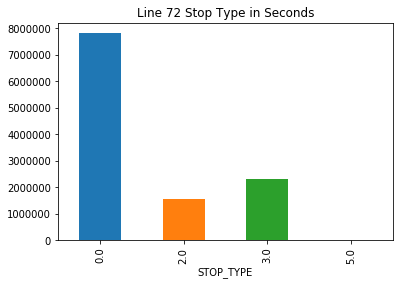

In [12]:
stop_type[(stop_type['LINE_ID'] == 72)].groupby(['STOP_TYPE'])['TIME_DIFF'].sum().plot(title = 'Line 72 Stop Type in Seconds', kind='bar', y= 'seconds')

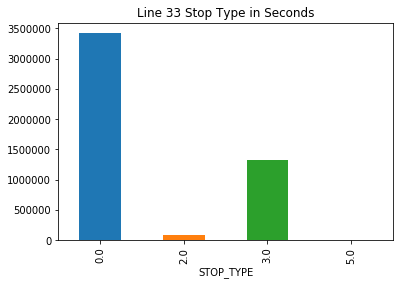

In [13]:
stop_type[(stop_type['LINE_ID'] == 33)].groupby(['STOP_TYPE'])['TIME_DIFF'].sum().plot(title = 'Line 33 Stop Type in Seconds', kind='bar', y= 'seconds')

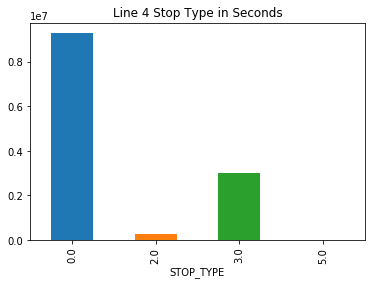

In [14]:
stop_type[(stop_type['LINE_ID'] == 4)].groupby(['STOP_TYPE'])['TIME_DIFF'].sum().plot(title = 'Line 4 Stop Type in Seconds', kind='bar', y= 'seconds')

In [15]:
stop_type['LINE_ID'].value_counts()

4      418341
72     345234
20     276038
75     264201
9      249585
15     232551
12     216582
57     187070
17     181923
19     170809
77     166653
8      160617
6      159618
33     149567
14     145668
44     126170
70     113653
71     111406
35     105575
52      98853
73      93814
76      68545
21      66470
62      63916
54      62902
10      59988
78      57989
48      56236
56      55983
94      52522
        ...  
51      10653
92      10580
66       9372
85       9173
80       9147
152      8847
68       8379
36       7864
81       7332
61       6898
64       6698
46       6431
29       6301
39       6133
97       5823
25       5773
156      5593
11       5554
23       4634
154      4520
53       4151
63       3670
65       3541
59       2879
55       2682
84       2668
37       2455
50       2246
18       1101
291       947
Name: LINE_ID, Length: 80, dtype: int64

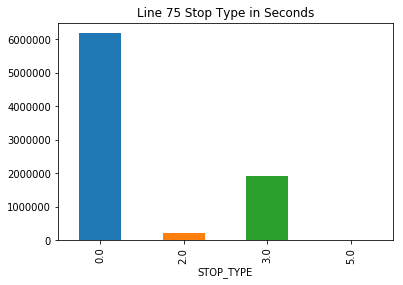

In [16]:
stop_type[(stop_type['LINE_ID'] == 75)].groupby(['STOP_TYPE'])['TIME_DIFF'].sum().plot(title = 'Line 75 Stop Type in Seconds', kind='bar', y= 'seconds')

Text(0.5,1,'Line 20 Stop Type in Seconds')

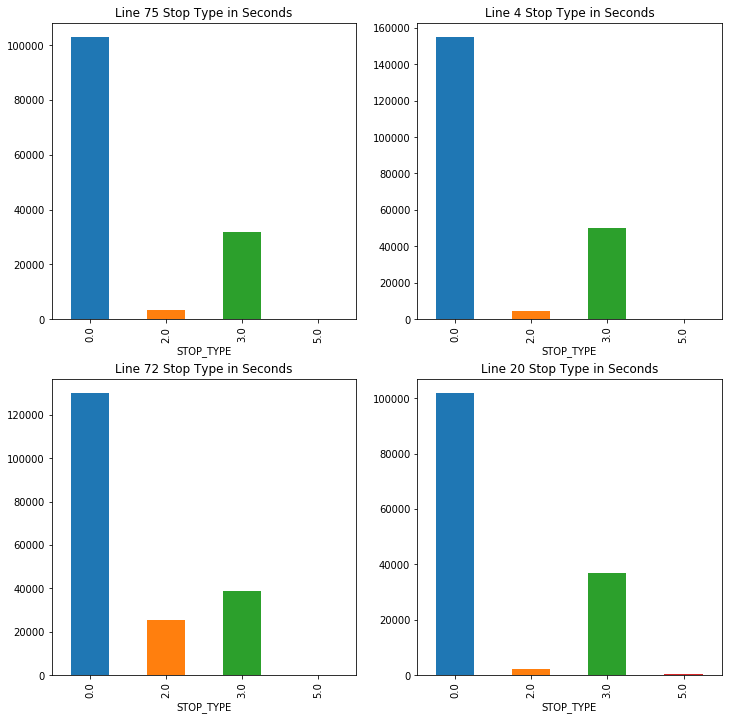

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,12))
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': True})

stop_type[(stop_type['LINE_ID'] == 75)].groupby(['STOP_TYPE'])['TIME_DIFF_MIN'].sum().plot(ax=axes[0,0], kind='bar', y= 'seconds'); axes[0,0].set_title('Line 75 Stop Type in Seconds')
stop_type[(stop_type['LINE_ID'] == 4)].groupby(['STOP_TYPE'])['TIME_DIFF_MIN'].sum().plot(ax=axes[0,1], kind='bar', y= 'seconds'); axes[0,1].set_title('Line 4 Stop Type in Seconds')
stop_type[(stop_type['LINE_ID'] == 72)].groupby(['STOP_TYPE'])['TIME_DIFF_MIN'].sum().plot(ax=axes[1,0], kind='bar', y= 'seconds'); axes[1,0].set_title('Line 72 Stop Type in Seconds')
stop_type[(stop_type['LINE_ID'] == 20)].groupby(['STOP_TYPE'])['TIME_DIFF_MIN'].sum().plot(ax=axes[1,1], kind='bar', y= 'seconds'); axes[1,1].set_title('Line 20 Stop Type in Seconds')
#plt.tight_layout()


In [18]:
line4_df = stop_type[(stop_type.LINE_ID == 4) & (stop_type.STOP_TYPE == 3)]
line4_df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110892 entries, 17881 to 10989200
Data columns (total 56 columns):
OPD_DATE_x            110892 non-null object
VEHICLE_ID_x          110892 non-null int64
MASTER_ID_x           0 non-null float64
EVENT_NO_x            110892 non-null int64
EVENT_NO_COURSE       110892 non-null int64
METERS_x              110892 non-null int64
ACT_DEP_TIME_x        110892 non-null int64
NOM_DEP_TIME_x        110892 non-null int64
NOM_END_TIME          110892 non-null int64
ACT_END_TIME          110887 non-null float64
LINE_ID               110892 non-null int64
COURSE_ID             110892 non-null int64
TRIP_ID               110706 non-null float64
PATTERN_ID            110892 non-null int64
PATTERN_DIRECTION     98820 non-null object
TRIP_TYPE             110892 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       110892 non-null int64
BLOCK_ID              110892 non-null int64
PASSENGER_DATA        110143 non-null float64
TI

In [19]:
line4_df.head(100)

,OPD_DATE_x,VEHICLE_ID_x,MASTER_ID_x,EVENT_NO_x,EVENT_NO_COURSE,METERS_x,ACT_DEP_TIME_x,NOM_DEP_TIME_x,NOM_END_TIME,ACT_END_TIME,LINE_ID,COURSE_ID,TRIP_ID,PATTERN_ID,PATTERN_DIRECTION,TRIP_TYPE,HIGHWAY_TYPE,PATTERN_QUALITY,BLOCK_ID,PASSENGER_DATA,TIME_GRP_ID,TRIP_CODE,DRIVER_ID,DATA_SOURCE,IS_ADDITIONAL_TRIP,TRIP_ROLE,TRIP_SUBROLE,TRIP_PURPOSE,EVENT_NO_y,EVENT_NO_TRIP,EVENT_NO_PREV,OPD_DATE_y,VEHICLE_ID_y,MASTER_ID_y,METERS_y,ACT_ARR_TIME,ACT_DEP_TIME_y,NOM_ARR_TIME,NOM_DEP_TIME_y,POINT_ID,STOP_ID,STOP_POS,DISTANCE_TO_NEXT,DISTANCE_TO_TRIP,DOORS_OPENING,POSITIONING_METHOD,STOP_TYPE,GPS_LONGITUDE,GPS_LATITUDE,PATTERN_IDX,DOOR_OPEN_TIME,POINT_ROLE,POINT_ACTION,PLAN_STATUS,TIME_DIFF,TIME_DIFF_MIN
17881,01SEP2017:00:00:00,3018,NaN,868785674,868785673,1008,19936,20160,20820,20823.0,4,1033634,11695331.0,347438,NaN,3,NaN,75,1019460,1.0,11695330.0,7609617,6715.0,4,0,D,N,NaN,868785681,868785674,868785680,01SEP2017:00:00:00,3018,NaN,4633,20215,20689,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.510347,45.499608,NaN,0.0,S,H,U,474,7.900000
17887,01SEP2017:00:00:00,3018,NaN,868785674,868785673,1008,19936,20160,20820,20823.0,4,1033634,11695331.0,347438,NaN,3,NaN,75,1019460,1.0,11695330.0,7609617,6715.0,4,0,D,N,NaN,868785682,868785674,868785681,01SEP2017:00:00:00,3018,NaN,5183,20753,20768,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.511142,45.504363,NaN,0.0,S,H,U,15,0.250000
17897,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785755,868785684,868785754,01SEP2017:00:00:00,3018,NaN,21219,23579,23586,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.665923,45.528702,NaN,0.0,S,H,U,7,0.116667
17909,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785738,868785684,868785737,01SEP2017:00:00:00,3018,NaN,16327,22548,22561,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.654598,45.504875,NaN,0.0,S,H,U,13,0.216667
17910,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785747,868785684,868785746,01SEP2017:00:00:00,3018,NaN,19254,23100,23108,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.679842,45.516972,NaN,0.0,S,H,U,8,0.133333
17912,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785780,868785684,868785779,01SEP2017:00:00:00,3018,NaN,26521,24562,24588,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.674883,45.569745,NaN,0.0,S,H,U,26,0.433333
17926,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785825,868785684,868785824,01SEP2017:00:00:00,3018,NaN,36088,26034,26079,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.756808,45.590648,NaN,0.0,S,H,U,45,0.750000
17940,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785757,868785684,868785756,01SEP2017:00:00:00,3018,NaN,21710,23766,23796,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.666597,45.532897,NaN,0.0,S,H,U,30,0.500000
17949,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785765,868785684,868785764,01SEP2017:00:00:00,3018,NaN,23482,24094,24111,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.667737,45.548318,NaN,0.0,S,H,U,17,0.283333
17956,01SEP2017:00:00:00,3018,NaN,868785684,868785673,5608,20873,20820,26160,26316.0,4,1033634,11695332.0,346575,I,0,NaN,99,1019460,1.0,11684668.0,7593798,6715.0,4,0,S,NL,NaN,868785731,868785684,868785730,01SEP2017:00:00:00,3018,NaN,14929,22302,22315,NaN,NaN,0,NaN,0,0.0,NaN,1.0,0,3.0,-122.636552,45.5

From here there are a few options:  
1. Do this same process for October and November and then concatenate the 3 dataframes showing disturbance stops for a line for all three months
2. Keep the months separate and concatanete the line numbers together by month
3. Do option one for all three line numbers and then concatanate for having all months and all line numbers together in one dataframe

Below is option #2 

In [20]:
line14_df = stop_type[(stop_type.LINE_ID == 14) & (stop_type.STOP_TYPE == 3)]
line14_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42618 entries, 13565 to 10978160
Data columns (total 56 columns):
OPD_DATE_x            42618 non-null object
VEHICLE_ID_x          42618 non-null int64
MASTER_ID_x           0 non-null float64
EVENT_NO_x            42618 non-null int64
EVENT_NO_COURSE       42618 non-null int64
METERS_x              42618 non-null int64
ACT_DEP_TIME_x        42618 non-null int64
NOM_DEP_TIME_x        42618 non-null int64
NOM_END_TIME          42618 non-null int64
ACT_END_TIME          42607 non-null float64
LINE_ID               42618 non-null int64
COURSE_ID             42618 non-null int64
TRIP_ID               42589 non-null float64
PATTERN_ID            42618 non-null int64
PATTERN_DIRECTION     37653 non-null object
TRIP_TYPE             42618 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       42618 non-null int64
BLOCK_ID              42618 non-null int64
PASSENGER_DATA        41821 non-null float64
TIME_GRP_ID         

In [21]:
line73_df = stop_type[(stop_type.LINE_ID == 73) & (stop_type.STOP_TYPE == 3)]
line73_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25382 entries, 43309 to 10988393
Data columns (total 56 columns):
OPD_DATE_x            25382 non-null object
VEHICLE_ID_x          25382 non-null int64
MASTER_ID_x           0 non-null float64
EVENT_NO_x            25382 non-null int64
EVENT_NO_COURSE       25382 non-null int64
METERS_x              25382 non-null int64
ACT_DEP_TIME_x        25382 non-null int64
NOM_DEP_TIME_x        25382 non-null int64
NOM_END_TIME          25382 non-null int64
ACT_END_TIME          25382 non-null float64
LINE_ID               25382 non-null int64
COURSE_ID             25382 non-null int64
TRIP_ID               25376 non-null float64
PATTERN_ID            25382 non-null int64
PATTERN_DIRECTION     23887 non-null object
TRIP_TYPE             25382 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       25382 non-null int64
BLOCK_ID              25382 non-null int64
PASSENGER_DATA        24849 non-null float64
TIME_GRP_ID         

In [27]:
all_lines_disturbance_df = pd.concat([line4_df,line14_df,line73_df],ignore_index=True)
all_lines_disturbance_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178892 entries, 0 to 178891
Data columns (total 56 columns):
OPD_DATE_x            178892 non-null object
VEHICLE_ID_x          178892 non-null int64
MASTER_ID_x           0 non-null float64
EVENT_NO_x            178892 non-null int64
EVENT_NO_COURSE       178892 non-null int64
METERS_x              178892 non-null int64
ACT_DEP_TIME_x        178892 non-null int64
NOM_DEP_TIME_x        178892 non-null int64
NOM_END_TIME          178892 non-null int64
ACT_END_TIME          178876 non-null float64
LINE_ID               178892 non-null int64
COURSE_ID             178892 non-null int64
TRIP_ID               178671 non-null float64
PATTERN_ID            178892 non-null int64
PATTERN_DIRECTION     160360 non-null object
TRIP_TYPE             178892 non-null int64
HIGHWAY_TYPE          0 non-null float64
PATTERN_QUALITY       178892 non-null int64
BLOCK_ID              178892 non-null int64
PASSENGER_DATA        176813 non-null float64
TIME_GR

In [29]:
all_lines_disturbance_df.to_csv('Lines4_14_73_Disturbance_Stops.csv')